In [1]:
# imports
import statistics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# configurations
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 15
colors = ["#003560", "#EF4700", "#EFB400", "#00B917", "#72009F"]

In [3]:
# helper functions
def format_plot(xtick_labels, rotate_xtick_labels, label_x, label_y):
    if rotate_xtick_labels:
        plt.xticks(np.arange(len(xtick_labels)), xtick_labels, rotation=45, ha="right")
    else:
        plt.xticks(np.arange(len(xtick_labels)), xtick_labels, rotation=0)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

def save_plot(filename):
    plt.tight_layout()
    plt.savefig("../paper/fig/" + filename)

In [4]:
# load data
step3 = pd.read_csv("../survey_tool/data/results/full_study/step3.csv")
test_persons = pd.read_csv("../survey_tool/data/results/full_study/test_persons.csv")

In [5]:
# Number of rated domains
len(step3)

2879

In [6]:
# Distinct number of domains
step3.test_domain.nunique()

1307

In [7]:
# Number domains created in step 2
len(step3[step3.type==1])

1846

In [8]:
# Distinct number of domains created in step 2
step3[step3.type==1].test_domain.nunique()

1084

In [9]:
len(step3[step3.type==0])

1033

In [10]:
# Distinct number of phishtank domains
step3[step3.type==0].test_domain.nunique()

223

# Rating

In [11]:
# Average rating per domain
step3["result"].describe()

count    2879.000000
mean        2.729420
std         1.453019
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: result, dtype: float64

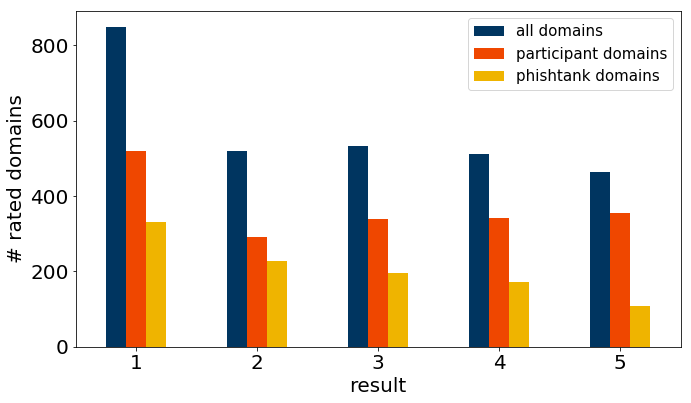

In [12]:
# Number of domains per rating for all domains, participant domains, phishtank domains
all_domains = step3.groupby(step3.result).user_id.count()
phishtank_domains = step3[step3["type"] == 0].groupby(step3.result).user_id.count()
participant_domains = step3[step3["type"] == 1].groupby(step3.result).user_id.count()
pd.DataFrame({"all domains": all_domains,\
              "phishtank domains": phishtank_domains,\
              "participant domains": participant_domains}).plot(kind="bar", color=colors)
labels = ("1", "2", "3", "4", "5")
format_plot(labels, False, "result", "# rated domains")
save_plot("step3_rating_distribution.pdf")

AxesSubplot(0.125,0.125;0.775x0.755)


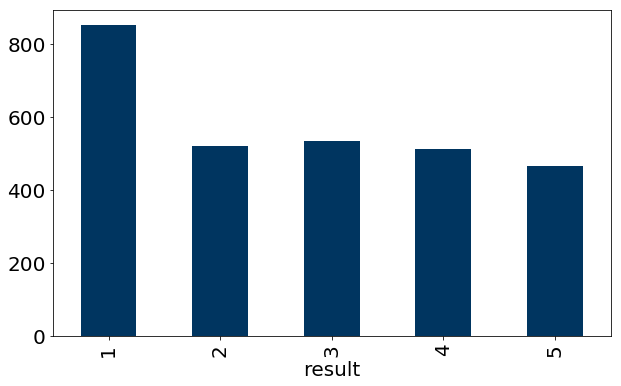

In [13]:
# Number of domains per rating
print(step3.groupby(step3.result).count().plot(kind="bar", color=colors[0], legend=False))

In [14]:
# Average rating per Phishtank domain
step3[step3["type"] == 0]["result"].describe()

count    1033.000000
mean        2.517909
std         1.361827
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: result, dtype: float64

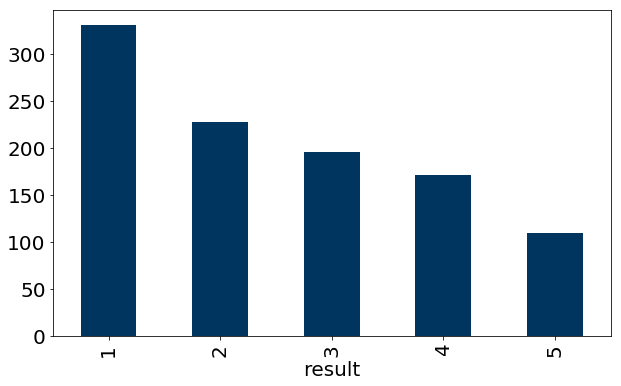

In [15]:
# Number of Phishtank domains per rating
step3[step3["type"] == 0].groupby(step3.result).count().plot(kind="bar", color=colors[0], legend=False)

In [16]:
# Average rating per user generated domain
step3[step3["type"] == 1]["result"].describe()

count    1846.000000
mean        2.847779
std         1.488934
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: result, dtype: float64

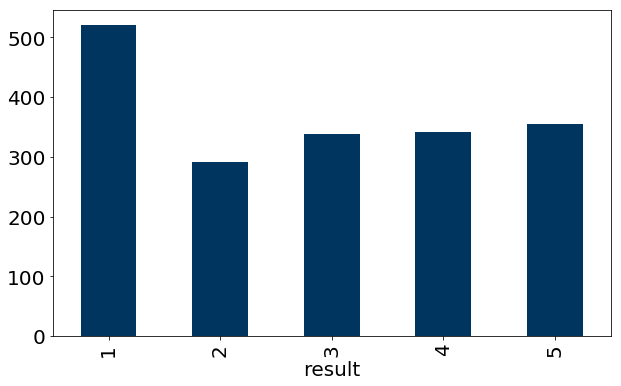

In [17]:
# Number of user generated domains per rating
step3[step3["type"] == 1].groupby(step3.result).count().plot(kind="bar", color=colors[0], legend=False)

In [18]:
# Which squatting technique got the best ratings?

# Time spent

In [19]:
# How much time spent participants per domain?
step3["elapsed_time"].describe()

count     2879.000000
mean      3518.198333
std       4312.833196
min         29.000000
25%       1920.000000
50%       2722.000000
75%       3867.500000
max      86461.000000
Name: elapsed_time, dtype: float64

In [20]:
# How much time spent participants per Phishtank domain?
step3[step3["type"] == 0]["elapsed_time"].describe()

count     1033.000000
mean      3478.874153
std       4042.286140
min         32.000000
25%       1900.000000
50%       2752.000000
75%       3869.000000
max      82069.000000
Name: elapsed_time, dtype: float64

In [21]:
# How much time spent participants per user generated domain?
step3[step3["type"] == 1]["elapsed_time"].describe()

count     1846.000000
mean      3540.203684
std       4457.986640
min         29.000000
25%       1928.000000
50%       2707.500000
75%       3866.250000
max      86461.000000
Name: elapsed_time, dtype: float64

# Statistics per User

In [22]:
# Create dataframe with statistics per user
statistics_per_user = {}
for index, row in step3.iterrows():
    user_id = row["user_id"]
    if user_id not in statistics_per_user:
        statistics_per_user[user_id] = {"classified_domains": 0, "result_sum": 0, "time_sum": 0,\
                                        "result_avg": 0.0, "time_avg": 0.0}
    statistics_per_user[user_id]["classified_domains"] += 1
    statistics_per_user[user_id]["result_sum"] += row["result"]
    statistics_per_user[user_id]["time_sum"] += row["elapsed_time"]
    
for user_id in statistics_per_user.keys():
    statistics_per_user[user_id]["result_avg"] = statistics_per_user[user_id]["result_sum"] /\
                                                 statistics_per_user[user_id]["classified_domains"]
    statistics_per_user[user_id]["time_avg"] = statistics_per_user[user_id]["time_sum"] /\
                                               statistics_per_user[user_id]["classified_domains"]
statistics_per_user = pd.DataFrame.from_dict(statistics_per_user, orient="index")

AxesSubplot(0.125,0.125;0.775x0.755)


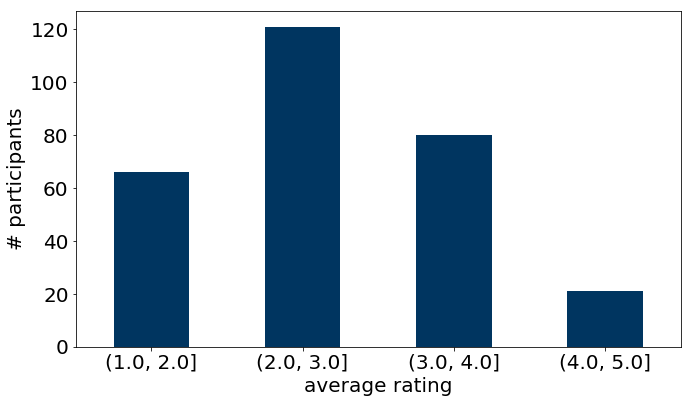

In [23]:
# How many domains were classified per participant
result_bins = pd.cut(statistics_per_user.result_avg, bins=[1.0, 2.0, 3.0, 4.0, 5.0], include_lowest=True)
print(result_bins.value_counts().sort_index().plot(kind="bar", color=colors[0], legend=False))
labels = ("(1.0, 2.0]", "(2.0, 3.0]", "(3.0, 4.0]", "(4.0, 5.0]")
format_plot(labels, False, "average rating", "# participants")
save_plot("step3_rating_distribution_per_user.pdf")

# Statistics per domain

In [24]:
# Create dataframe with statistics per domain
statistics_per_domain = {}
for index, row in step3.iterrows():
    test_domain = row["test_domain"]
    if test_domain not in statistics_per_domain:
        statistics_per_domain[test_domain] = {"ratings_count": 0, "ratings_sum": 0, "time_sum": 0,\
                                              "ratings": [],
                                              "min_rating": row["result"], "max_rating": row["result"],\
                                              "ratings_avg": 0.0, "time_avg": 0.0, "std_dev": 0.0,\
                                              "type": row["type"]}
    statistics_per_domain[test_domain]["ratings_count"] += 1
    statistics_per_domain[test_domain]["ratings_sum"] += row["result"]
    statistics_per_domain[test_domain]["ratings"].append(row["result"])
    statistics_per_domain[test_domain]["time_sum"] += row["elapsed_time"]
    if row["result"] < statistics_per_domain[test_domain]["min_rating"]:
        statistics_per_domain[test_domain]["min_rating"] = row["result"]
    if row["result"] > statistics_per_domain[test_domain]["max_rating"]:
        statistics_per_domain[test_domain]["max_rating"] = row["result"]
    
for test_domain in statistics_per_domain.keys():
    statistics_per_domain[test_domain]["ratings_avg"] = statistics_per_domain[test_domain]["ratings_sum"] /\
                                                        statistics_per_domain[test_domain]["ratings_count"]
    statistics_per_domain[test_domain]["time_avg"] = statistics_per_domain[test_domain]["time_sum"] /\
                                                     statistics_per_domain[test_domain]["ratings_count"]
    if len(statistics_per_domain[test_domain]["ratings"]) > 1:
        statistics_per_domain[test_domain]["std_dev"] = statistics.stdev(statistics_per_domain[test_domain]["ratings"])
    statistics_per_domain[test_domain].pop("ratings", None)
statistics_per_domain = pd.DataFrame.from_dict(statistics_per_domain, orient="index")

(-0.001, 1.0]    285
(1.0, 2.0]       245
(2.0, 3.0]        86
(3.0, 4.0]         0
(4.0, 5.0]         0
Name: std_dev, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


TypeError: format_plot() missing 4 required positional arguments: 'xtick_labels', 'rotate_xtick_labels', 'label_x', and 'label_y'

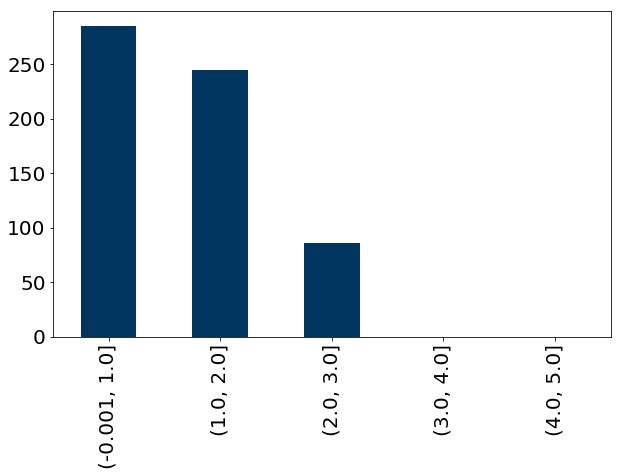

In [25]:
# How many domains were classified per participant
std_dev_bins = pd.cut(statistics_per_domain[statistics_per_domain.ratings_count>1].std_dev, bins=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], include_lowest=True)
print(std_dev_bins.value_counts().sort_index())
print(std_dev_bins.value_counts().sort_index().plot(kind="bar", color=colors[0], legend=False))
format_plot()
#save_plot("step3_rating_std_dev.pdf")

In [26]:
std_dev_bins_phishtank = pd.cut(statistics_per_domain[(statistics_per_domain.type==0) &\
                                                      (statistics_per_domain.ratings_count>1)].std_dev,
                                bins=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], include_lowest=True)
print(std_dev_bins_phishtank.value_counts().sort_index())

(-0.001, 1.0]     77
(1.0, 2.0]       123
(2.0, 3.0]        11
(3.0, 4.0]         0
(4.0, 5.0]         0
Name: std_dev, dtype: int64


In [27]:
std_dev_bins_step2 = pd.cut(statistics_per_domain[(statistics_per_domain.type==1) &\
                                                  (statistics_per_domain.ratings_count>1)].std_dev,
                            bins=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], include_lowest=True)
print(std_dev_bins_step2.value_counts().sort_index())

(-0.001, 1.0]    208
(1.0, 2.0]       122
(2.0, 3.0]        75
(3.0, 4.0]         0
(4.0, 5.0]         0
Name: std_dev, dtype: int64


In [28]:
statistics_per_domain[statistics_per_domain.ratings_count>1]

,max_rating,ratings_count,ratings_sum,std_dev,min_rating,time_avg,type,time_sum,ratings_avg
08dhl-mobile.com,3,2,5,0.707107,2,4111.500000,1,8223,2.500000
0orangeh9.com,4,3,6,1.732051,1,2015.333333,1,6046,2.000000
1https.connect.secure.wellsfargo.com.tropfsteinhoehle.com,4,4,7,1.500000,1,2086.500000,0,8346,1.750000
1inetflix-validation.com,3,2,6,0.000000,3,1012.000000,1,2024,3.000000
3netflix-verify.com,2,2,3,0.707107,1,7398.000000,1,14796,1.500000
4n3e8.att.com.qhdt5.test-domain.com,1,2,2,0.000000,1,2696.500000,1,5393,1.000000
4p76y.instagram.com.pjc11.test-domain.com,2,3,6,0.000000,2,3186.666667,1,9560,2.000000
5gjvr.chase.com.mobile.test-domain.com,4,2,6,1.414214,2,1704.000000,1,3408,3.000000
602qk.xfinity.com.test-domain.com,1,4,4,0.000000,1,3897.000000,1,15588,1.000000
77quq.dropbox.com.secure.test-domain.com,1,2,2,0.000000,1,2085.000000,1,4170,1.000000


In [29]:
statistics_per_domain.loc["americanexpressbeta.com"]

max_rating           4.000000
ratings_count        6.000000
ratings_sum         15.000000
std_dev              1.048809
min_rating           1.000000
time_avg          3559.833333
type                 0.000000
time_sum         21359.000000
ratings_avg          2.500000
Name: americanexpressbeta.com, dtype: float64

In [30]:
statistics_per_user

,result_sum,classified_domains,time_avg,time_sum,result_avg
009ab515-ca53-4b73-bd06-8e42a38de79f,37,10,2125.8,21258,3.7
00b875a6-31a0-4f2d-a400-f9f0437bfc6b,36,10,4874.7,48747,3.6
0146d644-83c3-4d6d-a370-5f33308b04bf,11,10,2440.9,24409,1.1
01811c94-3234-4078-a4f6-bfcbf3a8b34b,25,10,5177.1,51771,2.5
01dd4ff8-5de3-4e1b-b5ad-2c5497b61228,41,10,1687.1,16871,4.1
028c3e61-13b4-4111-87c9-5b121835fc7e,28,10,4098.2,40982,2.8
02bb8e6f-6568-4fd2-b349-194952dfb0b6,23,10,4438.4,44384,2.3
034da21e-4f4b-4179-8c10-f5b1e14c006f,35,10,5751.5,57515,3.5
03da7f63-4e6f-4b60-97f7-6ae59303251e,43,10,6550.7,65507,4.3
041d024b-979d-4896-b005-6240deb44d72,23,10,3690.3,36903,2.3


In [31]:
step3

,user_id,test_domain,elapsed_time,result,type
0,ef03e9ec-33a3-4733-b714-fee31a93756b,login.att.net.issue-authentication.ml,1760,2,0
1,ef03e9ec-33a3-4733-b714-fee31a93756b,www.dhl.info.pl,2200,4,0
2,bf3eebee-327b-4136-b3fb-0729a71e93aa,online.americaexpress.moracom.co.uk,3991,3,0
3,bf3eebee-327b-4136-b3fb-0729a71e93aa,microsoft-openings-security-alert-errorpage111...,4077,2,0
4,bf3eebee-327b-4136-b3fb-0729a71e93aa,facebook.lbyts.com,2656,2,0
5,bf3eebee-327b-4136-b3fb-0729a71e93aa,secure.store.apple.com.next-sign-up.com,3136,3,0
6,be07c01a-ddd0-40ae-a147-e0e40fb895ab,secureonline.att.homephoneandinternet.actlap.org,3290,4,0
7,be07c01a-ddd0-40ae-a147-e0e40fb895ab,refresh.linkedin.com.cgibin3302asuas.login-sub...,2864,3,0
8,78b800ab-37b4-43d5-9b88-f984c92d06a3,ssl-google-com-secured.spiritualscholars.com,2909,2,0
9,78b800ab-37b4-43d5-9b88-f984c92d06a3,secure.amazon.com.best-effectresources.com,3276,3,0
